<center> <h1> Aplicação da Decomposição em Componentes Principais (PCA) em Textos Criptografados </h1> </center>

***

#### **Disciplina**: Computação Científica e Análise de Dados

#### **Professor**: João Paixão

#### **Nome**: Pedro Henrique Honorio Saito

#### **DRE**: 122149392

***

## Resumo

$\newcommand\mycolv[1]{\begin{bmatrix}#1\end{bmatrix}}$

Desejo avaliar a eficiência de diferentes métodos de criptografia por meio da aplicação das seguintes técnicas:

- Utilização de modelos pré treinados para a conversão de palavras em vetores (Word2Vec).

- Análise de Componentes Principais (PCA).

- Técnicas de clusterização, especificamente, K-Means após a utilização do PCA.

- Determinação da variância entre as 

Para isso, irei comparar diferentes métodos de criptografia, tais como os listados abaixo:

- Substituição simples (Cifra de César)

- RSA

Escolhi esses dois métodos por se basearem em princípios completamente distintos

***

## Formulação Matemática

Para a facilitação das análises, foi escolhido o modelo de linguagem *FastText* do Facebook, notadamente pré-treinado com um vocabulário em português. A escolha pelo modelo se baseia no fato dele permitir a representação de palavras fora do vocabulário, ou também conhecidas por *OOV* (Out of Vocabulary Words). Embora, ainda é necessário passar tais palavras para o modelo para que ele possa atribuir um vetor correspondente. Nesse sentido, irei abordar superficialmente o processo de conversão de palavras em vetores.

Para transformar palavras em vetores e aplicar técnicas de agrupamento (clustering), seguimos os seguintes passos:

1. **Representação de Palavras em Vetores**

O modelo *FastText* gera vetores tanto para palavras presentes no vocabulário em que foi treinado, quanto para palavras fora desse escopo, mediante as subcomponentes das palavra (subpalavras). Podemos visualizar o procedimento da seguinte forma:

- Temos um conjunto original de palavras $W=\{w_1,w_2,\dots,w_n\}$ em que $n$ equivale à quantidade de palavras no texto original.

- Temos um modelo de vetorização das palavras no vocabulário $\phi:W\to\Bbb{R}^d$

Portanto, para cada palavra $w_i \in W$, é atribuído um vetor correspondente $\phi(w_i)$ de dimensão $d$. No caso do modelo escolhido, estamos trabalhando com $d=300$.

2. **Modelo FastText**

De antemão, é importante considerar que o texto original deve ser tratado antes que passe pelo proceso de vetorização. Esse tratamento envolve a remoção de acentos e pontuações indesejadas, sendo conhecido por **tokenização**.

Como havia mencionado, o modelo *FastText* leva em consideração tanto as palavras originais quanto suas componentes no processo de vetorização. Com efeito, um vetor de uma palavra $w$ é obtido:

$$
\phi(w)=\sum_{g\in G(w)}\mathbf{v}_g
$$

De modo que:

- $G(w)$ é o conjunto de subpalavras de $w$.

- $\mathbf{v}_g$ é o vetor da subcomponente $g$.

3. **Decomposição em Componentes Principais (PCA)**

Após a conversão tanto do texto original, quanto das palavras fora do vocabulário (*OOV*) em vetores, começamos o processo de redução de dimensionalidade da nossa matriz de entrada por meio do PCA. Vou detalhar exatamente o que está acontecendo:

Primeiramente, os vetores correspondentes às palavras no texto original são convertidos em uma matriz onde cada linha representa um vetor de dimensão $300$ e cada coluna corresponde a uma característica ("**coisas**") específica dos vetores.

Vamos denotar cada vetor convertido $\phi(w_i)$ por $c_i,\;\forall i \in [0,n]$.

Feito isso, ajustando cada vetor em linhas de uma matriz $M_{n \times 300}$ teremos algo como:

$$
\begin{align}
\qquad\; \small \text{"coisa 1"} \quad \quad \small \text{"coisa n"} \\
M=
\mycolv{c_{1,1} & \dots & c_{1,300} \\ c_{2,1} & \dots & c_{2,300} \\ & \vdots & \\ c_{n,1} & \dots & c_{n,300}}
\end{align}
$$

Mas, antes de aplicar o PCA, precisamos centralizar nosso conjunto de dados. Essa etapa envolve substrair a média de cada variável dos dados, de modo que cada dado tenha média zero.

$$
M_{\text{centralizado}}=M - \text{média}(M)
$$

4. **Interpretação com Função de Três Variáveis e Multiplicadores de Lagrange**

Para compreendermos melhor o problema de decomposição em componentes principais, vamos nos concentrar nos seguintes passos:

Em primeiro lugar, o problema de decomposição em componentes principais (PCA) envolve encontrar uma nova base para os dados de modo que a variância projetada (das nossas amostras) seja maximizada. Portanto, sendo $M$ a matriz cujas linhas são os vetores e as colunas indicam suas características, estamos interessados em obter:

$$
v_1, v_2, v_3 = \text{argmax}_{\|v_i\|=1} \|Mv\|^2
$$

Dado que:

- $\|Mv\|^2$ equivale ao tamanho das projeções sobre as componentes principais (vetores $v_1,v_2$ e $v_3$).

- $\|v_i\|=1$ corresponde à restrição dos vetores serem todos unitários.

Como podemos ver, a primeira expressão $\|Mv\|^2$ pode ser modelada da seguinte forma:

$$
\|Mv\|^2 = \left \| \mycolv{- & c_1 & - \\ - & \vdots & - \\ - & c_n & -} \mycolv{| \\ v \\ |} \right \|^2
$$

Como desejamos obter o módulo do resultado desse produto interno, podemos simplificar isso tudo para:

$$
|c_1^t v|^2 + \dots + |c_n^t v|^2
$$

Com efeito, podemos modelar essa expressão como uma equação de três variáveis, isto é, considerando que nossas componentes principais $v_1,v_2$ e $v_3$ estão contidas em $\Bbb{R}^3$. Logo,

$$
f(x,y,z)=|c_1^t v|^2 + \dots + |c_n^t v|^2,\quad \|v_1\|=\|v_2\|=\|v_3\|=1
$$

Dado que desejamos maximizar uma função de três variáveis, sujeita à restrição dos vetores serem unitários, podemos utilizar o conceito de **Multiplicadores de Lagrange**. Segundo esse conceito, para maximizar (ou minimizar) uma função $f(x,y,z)$ sujeita a uma ou mais restrições $g_i(x,y,z)=0$, devemos encontrar os pontos onde os gradientes da função objetivo e das restrições são lineares. Isto é, estamos interessados nos pontos nos quais os vetores gradientes das funções $f$ e $g$ são paralelos entre si. Portanto, o método estabelece que, para maximizar (ou minimizar) a função $f(x,y,z)=0$, devemos encontrar os fatores $\lambda$ tais que:

$$
\nabla f(x) = \lambda \nabla g(x)
$$

Com base nessa equação, após calcular as derivadas parciais em ambos os lados, obteremos como resultado um sistema com o seguinte formato:

$$
\begin{align}
&\nabla f(v) = \lambda \nabla g(v) \\
=&2 (A^TA)v = \lambda (2v) \\
=&(A^TA)v=\lambda v \\
=&Mv = \lambda v
\end{align}
$$

Nesse sentido, descobrimos que nossa matriz $M$ corresponde à chamada matriz de covariância $A^TA$ para a qual desejamos encontrar o autovetor associado ao maior autovalor $\lambda$ com o objetivo de maximizar a função.

5. 

, desejamos encontrar um vetor que maximize a variância dos dados projetos (nossas palavras vetorizadas) ao longo de um vetor $v$. vamos começar definindo que desejamos maximizar a variância dos dados projetados ao longo de um vetor $v$, sujeito à restrição de que $v$ tenha comprimento unitário, ou seja, $v^tv=1$.

Com isso, precisamos centralizar nosso conjunto de dados e calcular a matriz de covariância:

$$
C = \frac{1}{n-1}M^T M
$$



### Primeiros Passos: Coleta de Dados

Como a análise se concentra na interpretação dos vetores finais reduzidos das palavras, a coleta dos dados foi feita por meio da escolha de textos e poemas da cultura brasileira. Por esse motivo, o primeiro texto escolhido foi um poema famoso chamado Soneto de Fidelidade de Vinicius de Moraes:

$$
\begin{array}{l}
\text{De tudo, ao meu amor serei atento} \\
\text{Antes, e com tal zelo, e sempre, e tanto} \\
\text{Que mesmo em face do maior encanto} \\
\text{Dele se encante mais meu pensamento.} \\
\\
\text{Quero vivê-lo em cada vão momento} \\
\text{E em louvor hei de espalhar meu canto} \\
\text{E rir meu riso e derramar meu pranto} \\
\text{Ao seu pesar ou seu contentamento.} \\
\\
\text{E assim, quando mais tarde me procure} \\
\text{Quem sabe a morte, angústia de quem vive} \\
\text{Quem sabe a solidão, fim de quem ama} \\
\\
\text{Eu possa me dizer do amor (que tive):} \\
\text{Que não seja imortal, posto que é chama} \\
\text{Mas que seja infinito enquanto dure.} \\
\end{array}
$$

Por fim, a segunda amostra coletada foi um parágrafo da obra brasileira Capitães de Areia, descrita abaixo:

$$
\begin{array}{l}
\text{A cidade, já escura, tinha muitas pessoas andando nas ruas. E havia a alegria, o som do mar.} \\
\text{A cidade era feita de alegrias e tristezas. Pedro Bala se afastou do cais e entrou nas ruas escuras,} \\
\text{cheias de sombras e de gente que caminhava apressada. Ele conhecia bem aquelas ruas, cada beco, cada viela.} \\
\text{Os Capitães da Areia dominavam aquele lugar.} \\
\\
\text{Chegou à Praça dos Mártires, onde os meninos costumavam se reunir. A praça estava vazia, mas ele sabia que logo} \\
\text{estariam todos ali. Sentou-se num banco e ficou esperando. Pensou em Dora, a menina que haviam encontrado} \\
\text{dias atrás e que agora fazia parte do grupo. Dora era uma flor no meio daquelas vidas duras. Pedro Bala sentia} \\
\text{uma coisa diferente quando pensava nela, algo que não sabia explicar.} \\
\\
\text{Logo chegaram os outros. Sem-Pernas, com seu andar manco e seu jeito revoltado, Professor, sempre com um livro} \\
\text{na mão, e o Gato, ágil e esperto como poucos. Todos sentaram-se ao redor de Pedro Bala, esperando as ordens} \\
\text{do líder. Ele tinha um plano. Precisavam conseguir comida e roupas. A noite prometia ser longa e cheia de aventuras.} \\
\\
\text{Pedro Bala explicou o plano. Iria dividir o grupo em dois. Um ficaria de olho nas ruas, para dar o alarme se aparecesse} \\
\text{algum policial. O outro iria até o armazém do Seu Antônio. Era um velho sovina, mas o armazém tinha tudo que precisavam.} \\
\text{E Pedro Bala sabia como entrar sem ser visto. Todos ouviram com atenção, e logo estavam prontos para agir.} \\
\\
\text{A noite estava quente. A lua cheia iluminava as ruas, dando um ar quase mágico à cidade. Pedro Bala sentia-se vivo,} \\
\text{mais do que nunca. Com um gesto rápido, deu o sinal, e os Capitães da Areia se espalharam pela noite, cada um cumprindo} \\
\text{sua parte no plano. A aventura estava apenas começando.} \\
\end{array}
$$

Para ambas as amostras, irei aplicar um método de encriptação simples, conhecido popularmente por **Cifra de César**. Esse método consiste na substituição de cada letra no nosso texto por outra que aparece um número fixo de posições à frente ou atrás no alfabeto. Para o nosso caso, considerei o deslocamento em 3 unidades para simplificar a análise.

Por fim, vou aplicar um método extremamente robusto de criptografia, utilizado atualmente atualmente, conhecido pela sigla **RSA** (Rivest-Shamir-Adleman). Este método utiliza um par de chaves, uma pública e outra privada, para encriptar e desencriptar mensagens de forma segura, garantindo a confidencialidade e integridade dos dados.


### Tratamento dos dados: Tokenização

Logo após a coleta dos dados, é necessário convertê-los em uma forma legível para que o modelo treinado os identifique. Por esse motivo, tratamos nosso conjunto de palavras e removemos acentos, pontuações indesejadas e palavras repetidas, de modo que o conjunto final terá a seguinte cara:

In [1]:
# Exibindo tokens normais e criptografados
print('Aqui estão os 35 primeiros tokens usando Cifra de César (d=3):\n')

with open('tokens/poema_token.txt', 'r') as amostra, \
     open('tokens/poema_cripto_token.txt', 'r') as amostra_criptografada:
    tokens_texto_original = amostra.read().split()
    tokens_texto_criptografado = amostra_criptografada.read().split()
    
    max_len = max(len(token) for token in tokens_texto_original[:35])
    
    print(f'{"Entrada".ljust(max_len)}  |  Criptografado')
    print('-' * (max_len + 20))
    
    for tn, tc in zip(tokens_texto_original[:35], tokens_texto_criptografado[:35]):
        print(f'{tn.ljust(max_len)}  |  {tc}')

Aqui estão os 35 primeiros tokens usando Cifra de César (d=3):

Entrada        |  Criptografado
---------------------------------
vive           |  ghoh
e              |  hvsdokdu
contentamento  |  srvwr
me             |  ghuudpdu
pensamento     |  hqtxdqwr
canto          |  ylyhor
imortal        |  glchu
posto          |  sudqwr
dure           |  wxgr
ou             |  txhur
sabe           |  fkdpd
sempre         |  phx
mas            |  txhp
face           |  gxuh
tive           |  wdo
eu             |  shqvdphqwr
espalhar       |  ydr
antes          |  shvdu
zelo           |  wlyh
morte          |  idfh
seu            |  ulvr
angustia       |  wdugh
maior          |  pruwh
ao             |  lqilqlwr
amor           |  d
cada           |  pdlv
em             |  wdqwr
infinito       |  frp
possa          |  orxyru
mesmo          |  qdr
tal            |  gr
do             |  hp
quem           |  dqjxvwld
a              |  pdv
se             |  dwhqwr


### Treinamento do Modelo para as Palavras Fora do Vocabulário



Como mencionei anteriormente, os modelos pré-treinados não englobam palavras fora do vocabulário. No entanto, para a análise, optei pelo modelo *FastText*, que permite a geração de vetores para palavras desconhecidas por meio da associação das subpalavras que as compõe. 

Com efeito, para tratar das palavras criptografadas, basta compilar o modelo e rodar a seguinte linha:

```bash
./fasttext print-word-vectors /caminho/para/modelo < /caminho/para/token_criptografado.txt > output.txt
```

### Visualização dos resultados: 

Agora vamos analisar os resultados obtidos para cada amostra, começando com o poema de Vinicius de Moraes e a aplicação da **Cifra de César simples** como forma de criptografia:


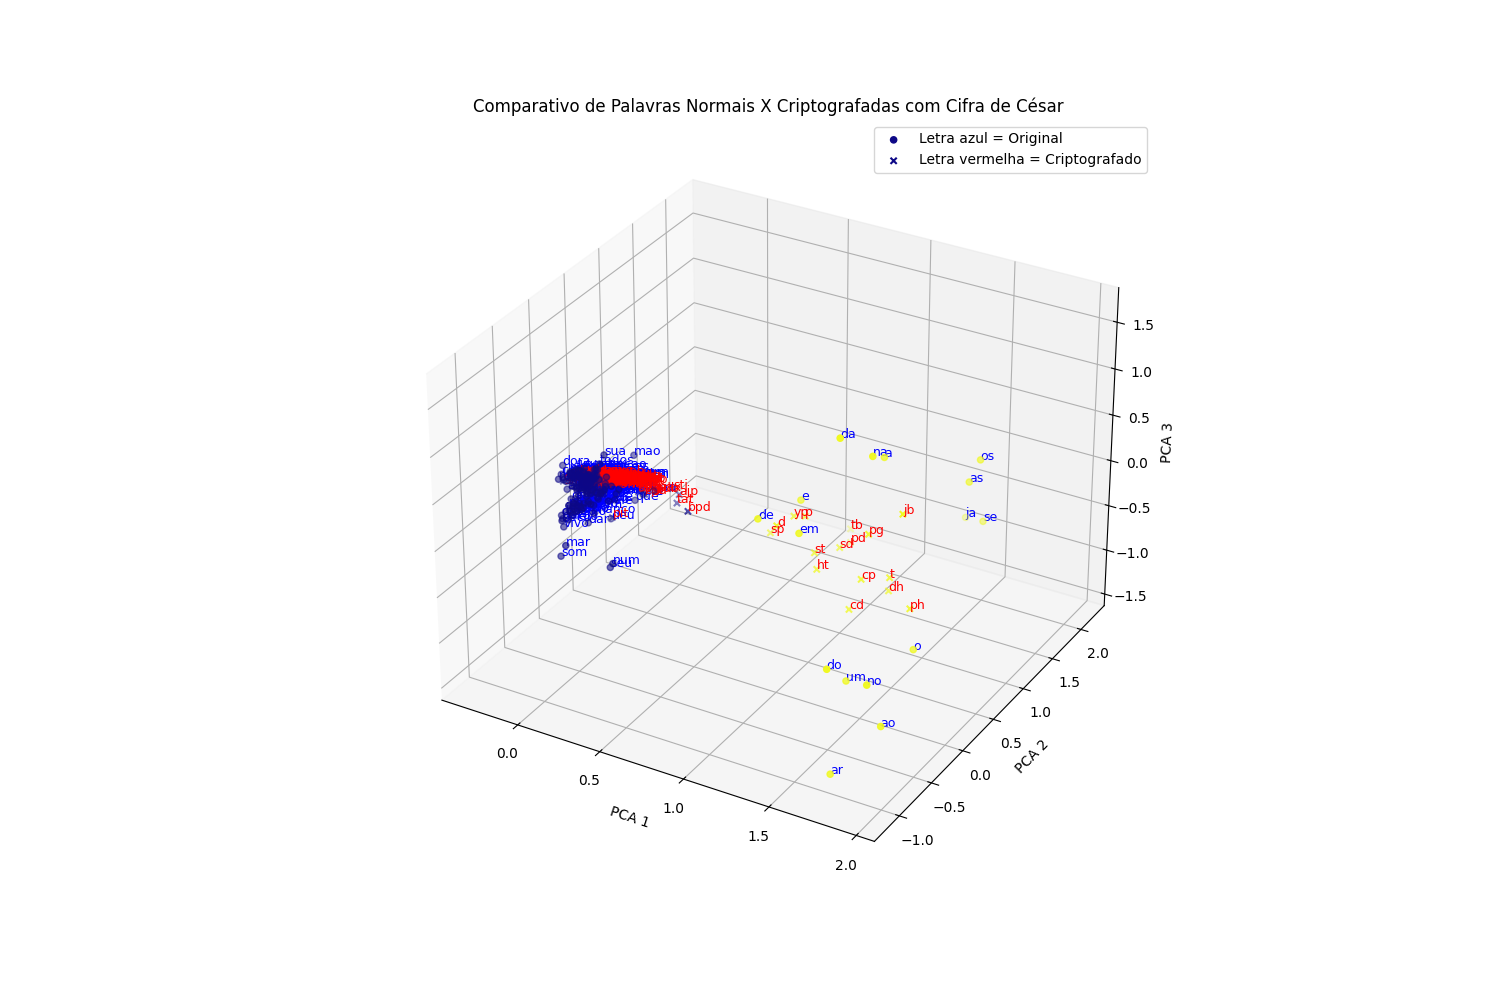

(array([[-1.57932555e-01,  1.03663704e-02,  6.20923727e-02],
        [-1.04610772e-01,  2.42828558e-01, -4.62835136e-01],
        [-1.55847751e-01,  2.16677779e-02,  1.31900650e-01],
        [-2.05790826e-01,  1.51706559e-02,  1.45444808e-01],
        [-1.95953721e-01, -5.70795619e-02,  3.02194933e-02],
        [-2.19794698e-01,  1.78087351e-01, -7.04126235e-02],
        [-1.14302518e-01,  3.23641371e-01, -3.07801917e-01],
        [-1.05912480e-01,  3.42228817e-02,  1.08809879e-01],
        [-6.23553771e-02, -3.37966965e-02,  8.42968787e-02],
        [-1.79274911e-01,  3.16139012e-02,  6.37383666e-02],
        [-1.38114580e-01, -7.53304278e-02, -1.62420234e-01],
        [-2.06958359e-01, -2.11126019e-01, -2.34420348e-01],
        [-1.78702794e-01,  1.49444941e-01, -1.34431543e-01],
        [-1.16721702e-01,  2.22866226e-02, -1.36026410e-02],
        [-1.67167335e-01, -1.64430218e-01, -2.05943464e-01],
        [-1.75645264e-01,  1.32849270e-01, -1.46105490e-01],
        [ 9.49355697e-03

In [1]:
%matplotlib widget
import fasttext
from base_funcoes import *

amostra = 'paragrafos'
metodo = 'cifra_cesar'
deslocamento = 15
titulo = 'Comparativo de Palavras Normais X Criptografadas com Cifra de César'

processamento_plotting(amostra=amostra, metodo=metodo, deslocamento=deslocamento, titulo=titulo)

### Primeiros Resultados: Parágrafos Capitães de Areia + Cifra de César com Deslocamento de 15 Unidades

Embora o gráfico dos vetores de palavras originais e criptografadas seja um pouco confuso, podemos extrair as seguintes conclusões:

- As palavras criptografadas estão em vermelho.

- As palavras originais estão em azul.

##### **1. Temos dois grupos significativos de palavras:**

**Primeiro grupo (Pontos Amarelos):** Substantivos e verbos contidos no texto original + Substantivos e verbos criptografadas.

- *Alguns exemplos incluem:* Lugar, redor, vazia, cheia..

**Segundo grupo (Pontos Azuis):** Conectivos, pronomes, preposições + Suas versões criptografadas.

- *Alguns exemplos envolvem:* De, do, eu, na, os, as..

##### **2. Número de caracteres faz parte da proximidade entre as palavras.**

Como podemos analisar palavras, tanto normais quanto criptografadas, que possuem quantidades semelhantes de caracteres estão posicionadas perto entre si.

##### **3. Distância de média entre pontos criptografados entre si de $0.3$ a $0.4$ aproximadamente.**

Como veremos posteriormente, ao usar o método de criptografia RSA a distância tende a ser muito menor, apro

##### **4. Deslocamento escolhido de letras não altera significativamente os vetores.**

#### Conclusão

Concluímos que, após a aplicação do mecanismo de criptografia de Cifra de César, independentemente do nível de deslocamento, as palavras criptografadas são deslocadas de forma uniforme, seguindo um padrão claramente distinto entre substantivos, verbos e do outro lado, pronomes, preposições, conjunções. Portanto, é plausível considerarmos uma função reversível e bijetora $f(c_i) \to \phi$ em que $\phi$ representa o vetor da palavra original e $c_i$ corresponderia à palavra criptografada


In [18]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Calculando distância par a par dos vetores
distancias = pdist(vetores_reduzidos_criptografados)

# Determinando a distância média
distancia_media = np.mean(distancias)

print("Distância média entre cada par de pontos criptografados:", distancia_media)

Distância média entre cada par de pontos criptografados: 0.331027223845172


### Critério de Verificação de Semelhanças

